In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import pandas as pd

In [65]:
df = pd.read_excel("SharkAttack_clean.xlsx")

In [66]:
df_no_unknown = df[(df["Fatal Y/N"] != "U") & (df["Activity"] != "unqualified")]

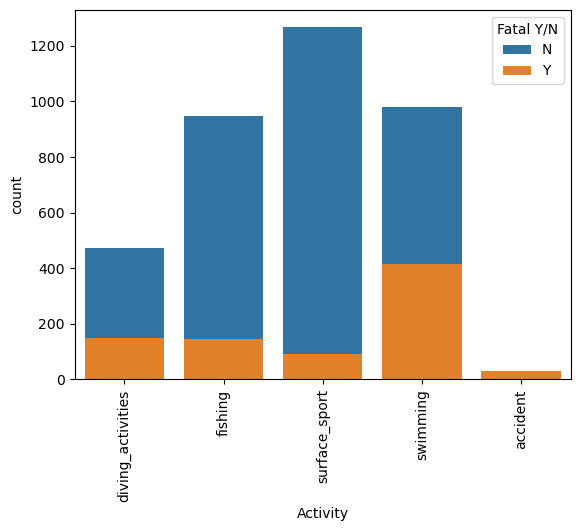

In [67]:
sns.countplot(df_no_unknown, x="Activity", hue="Fatal Y/N", dodge=False)
plt.xticks(rotation=90)
plt.show()

In [68]:
df_crosstab = pd.crosstab(df_no_unknown["Fatal Y/N"], df_no_unknown.Activity)

In [69]:
df_crosstab

Activity,accident,diving_activities,fishing,surface_sport,swimming
Fatal Y/N,,,,,
N,9,473,947,1266,981
Y,29,149,147,90,415


In [70]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(df_crosstab)

chi2_statistic, chi2_p_value

(359.5905758335372, 1.4896549798408316e-76)

In [71]:
association(df_crosstab, method="cramer")

0.2824935634088099

In [72]:
df_crosstab_normalized = df_crosstab.apply(lambda x: x / x.sum(), axis=0)
round(df_crosstab_normalized * 100, 2)

Activity,accident,diving_activities,fishing,surface_sport,swimming
Fatal Y/N,,,,,
N,23.68,76.05,86.56,93.36,70.27
Y,76.32,23.95,13.44,6.64,29.73


In [73]:
df_crosstab_normalized = round(df_crosstab_normalized.transpose()*100,2)

In [74]:
df_crosstab_normalized.sort_values(by="N")

Fatal Y/N,N,Y
Activity,,
accident,23.68,76.32
swimming,70.27,29.73
diving_activities,76.05,23.95
fishing,86.56,13.44
surface_sport,93.36,6.64


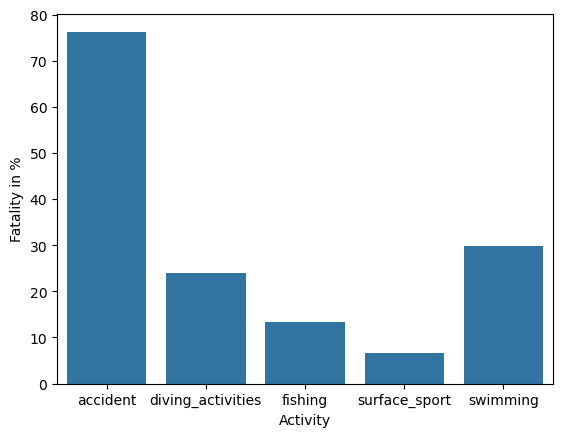

In [84]:
sns.barplot(df_crosstab_normalized, x="Activity",y="Y")
plt.ylabel("Fatality in %")
#plt.xticks(rotation=90)
plt.show()

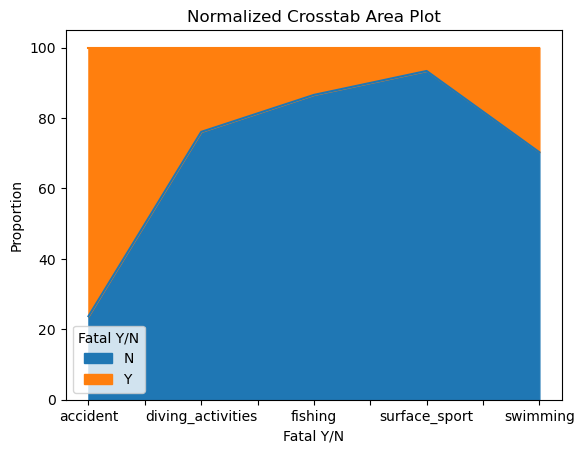

In [75]:
df_crosstab_normalized.plot(kind='area', stacked=True)
plt.title('Normalized Crosstab Area Plot')
plt.xlabel('Fatal Y/N')
plt.ylabel('Proportion')
plt.show()